## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing our data set

In [2]:
dataset=pd.read_csv('Position_Salaries.csv')
X=dataset.iloc[:,1:2].values # x should always be a matrix try to change it to [:,1] you will see the differnece
y=dataset.iloc[:,2].values
display(pd.DataFrame(dataset))
display(pd.DataFrame(X))
display(pd.DataFrame(y))

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


,0
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


,0
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


## Splitting the dataset into the Training set and Test set

In [3]:
"""from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
"""

'from sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)\n'

## Feature Scalling 

In [4]:
# the SVR doesn't take care of feature scalling itself
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
sc_y=StandardScaler()
X=sc_X.fit_transform(X)
y=np.squeeze(sc_y.fit_transform(y.reshape(-1, 1)))
display(pd.DataFrame(X))
display(pd.DataFrame(y))

,0
0,-1.566699
1,-1.218544
2,-0.870388
3,-0.522233
4,-0.174078
5,0.174078
6,0.522233
7,0.870388
8,1.218544
9,1.566699


,0
0,-0.720043
1,-0.702438
2,-0.667228
3,-0.596808
4,-0.491178
5,-0.350339
6,-0.174289
7,0.177810
8,0.882008
9,2.642503


## Fitting SVR to the dataset

In [5]:
from sklearn.svm import SVR
# guassian kernel 
regressor=SVR(kernel='rbf',gamma='scale')
regressor.fit(X,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result with the SVR

In [6]:
# transform what we want to predict and the answer
y_pred=sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))
display(pd.DataFrame(y_pred))

,0
0,170370.020407


## Visualizing the SVR

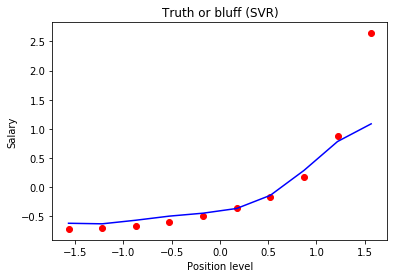

In [7]:
plt.scatter(X,y,color='red')
plt.plot(X,regressor.predict(X),color='blue')
plt.title('Truth or bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualizing the SVR with higher resolution and smoother curve

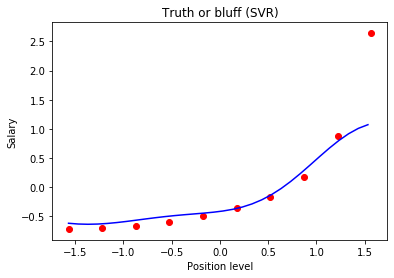

In [8]:
X_grid=np.arange(min(X),max(X),0.1) # increment by 0.1 to get better curve
X_grid=X_grid.reshape((len(X_grid)),1)
plt.scatter(X,y,color='red')
plt.plot(X_grid,regressor.predict(X_grid),color='blue')
plt.title('Truth or bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()